In [2]:
!git clone https://github.com/antoinedemathelin/ecas2025-transfer-learning.git

In [10]:
import sys
import copy
import pandas as pd
import  numpy as np
import sklearn.metrics as metr
import sklearn.model_selection as select
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import matplotlib.pyplot as plt
from sklearn import svm

In [12]:
from plot_utils import plot_dots, plot_dec_func

from skada import source_target_split
from skada.datasets import make_shifted_datasets

## Covariate shift

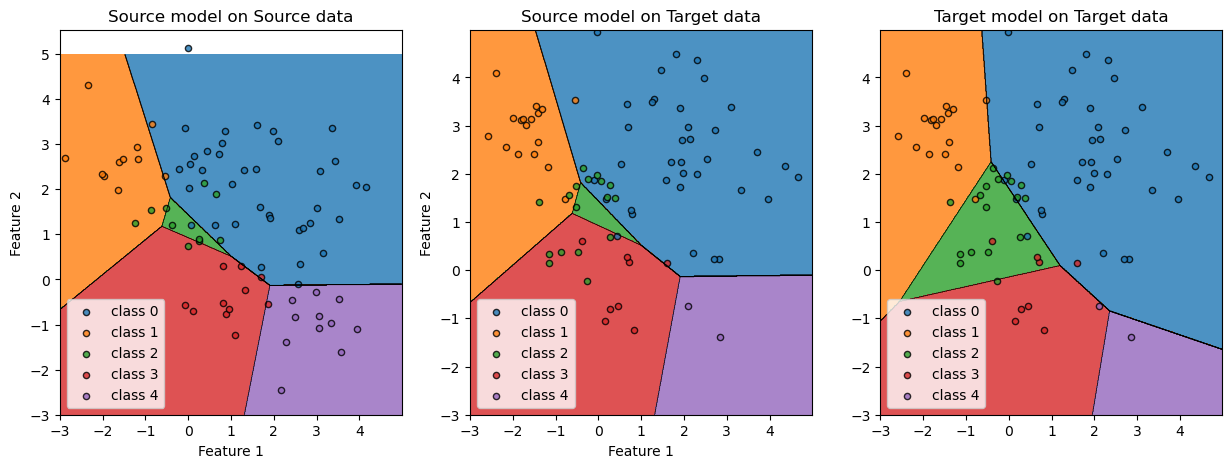

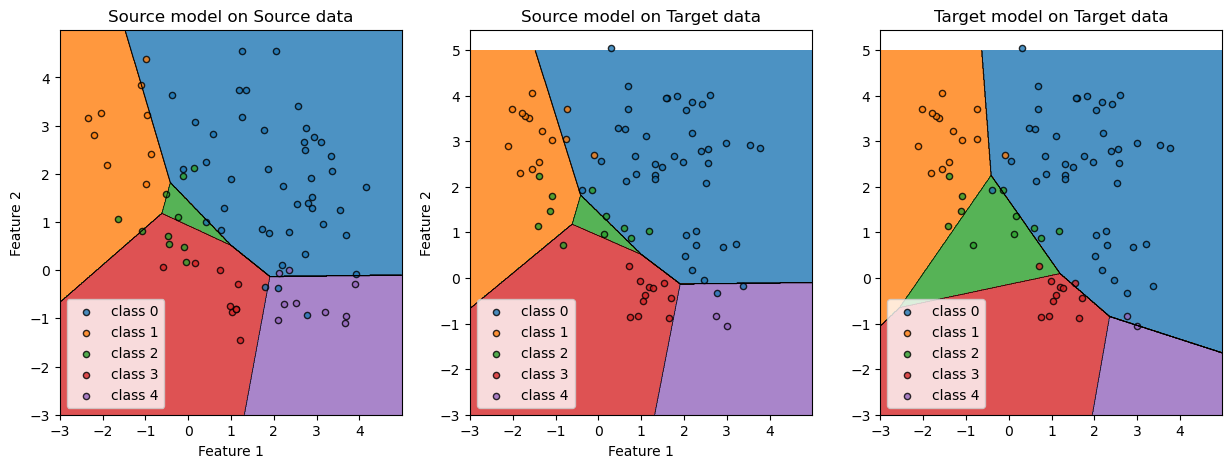

In [14]:
X, y, sample_domain = make_shifted_datasets(
        n_samples_source=20,
        n_samples_target=20,
        shift="covariate_shift",
        noise=0.6,
        label="multiclass",
        random_state=10,
        ratio=0.6,
        gamma=0.1
    )

X_source, X_target, y_source, y_target = source_target_split(X, y, sample_domain=sample_domain)

X_train_src, X_test_src, y_train_src, y_test_src = train_test_split(X_source, y_source, test_size=0.5, random_state=10, shuffle=True)
X_train_tgt, X_test_tgt, y_train_tgt, y_test_tgt = train_test_split(X_target, y_target, test_size=0.5, random_state=10, shuffle=True)

clf_src = svm.LinearSVC()
clf_tgt = svm.LinearSVC()

clf_src.fit(X_train_src,y_train_src)
clf_tgt.fit(X_train_tgt,y_train_tgt)

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))

plot_dec_func(ax[0], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Source data')
plot_dec_func(ax[1], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Target data')
plot_dec_func(ax[2], clf_tgt, -3, 5, -3, 5, plot_step = 0.01, title='Target model on Target data')

ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

plot_dots(ax[0],X_train_src,y_train_src, title='Source model on Source data')
plot_dots(ax[1],X_train_tgt,y_train_tgt, title='Source model on Target data')
plot_dots(ax[2],X_train_tgt,y_train_tgt, title='Target model on Target data')

fig.suptitle('Covariate shift / Testing data', fontsize=14)

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))

plot_dec_func(ax[0], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Source data')
plot_dec_func(ax[1], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Target data')
plot_dec_func(ax[2], clf_tgt, -3, 5, -3, 5, plot_step = 0.01, title='Target model on Target data')

ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

plot_dots(ax[0],X_test_src,y_test_src, title='Source model on Source data')
plot_dots(ax[1],X_test_tgt,y_test_tgt, title='Source model on Target data')
plot_dots(ax[2],X_test_tgt,y_test_tgt, title='Target model on Target data')

fig.suptitle('Covariate shift / Testing data', fontsize=14)

In [68]:
from skada.datasets import make_dataset_from_moons_distribution

target_marker = "*"
source_marker = "o"
xlim = (-1.5, 2.5)
ylim = (-1.5, 1.5)

X, y, sample_domain = make_dataset_from_moons_distribution(
    pos_source=[0.4, 0.25,0.5,0.7, 0.2, 0.1,0.1,0.1],
    pos_target=[ 0.3, 0.3, 0.5, 0.5,0.7,0.7,0.9,0.9,0.95,0.95],
    n_samples_source=50,
    n_samples_target=50,
    noise=0.2,
    random_state=10,
)

X_source, X_target, y_source, y_target = source_target_split(X, y, sample_domain=sample_domain)

Text(0.5, 0.98, 'Two moons covariate shift')

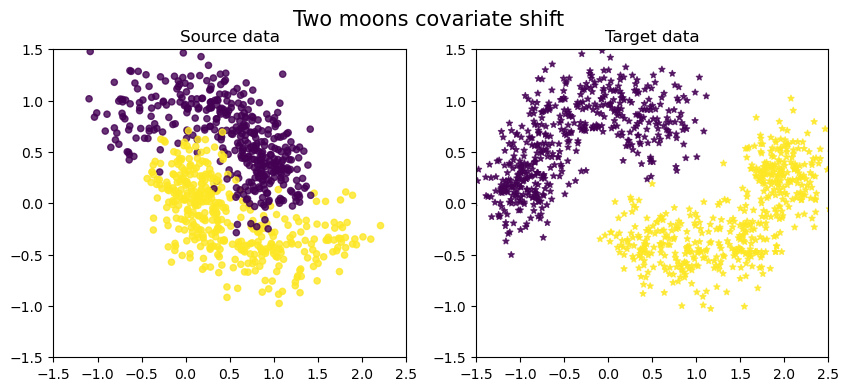

In [72]:
figure, axis = plt.subplots(1, 2, figsize=(10, 4))

axis[0].scatter(X_source[:, 0], X_source[:, 1], c=y_source, marker=source_marker,alpha=0.8,s=20)
axis[0].set_xlim(xlim)
axis[0].set_ylim(ylim)
axis[0].set_title("Source data")

axis[1].scatter(X_target[:, 0], X_target[:, 1], c=y_target, marker=target_marker,alpha=0.8,s=20)
axis[1].set_xlim(xlim)
axis[1].set_ylim(ylim)
axis[1].set_title("Target data")

figure.suptitle("Two moons covariate shift", fontsize=15)

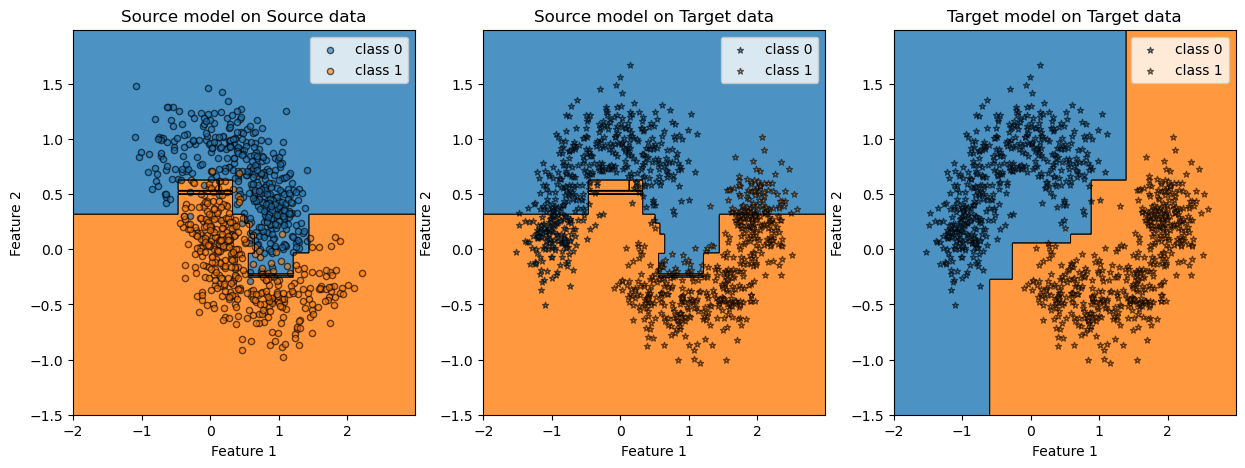

In [74]:
clf_dt_src = DecisionTreeClassifier()
clf_dt_tgt = DecisionTreeClassifier()

X_train_src, X_test_src, y_train_src, y_test_src = train_test_split(X_source, y_source, test_size=0.5, random_state=10, shuffle=True)
X_train_tgt, X_test_tgt, y_train_tgt, y_test_tgt = train_test_split(X_target, y_target, test_size=0.5, random_state=10, shuffle=True)

clf_dt_src.fit(X_train_src,y_train_src)
clf_dt_tgt.fit(X_train_tgt,y_train_tgt)


fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))

plot_dec_func(ax[0], clf_dt_src, -2, 3, -1.5, 2, plot_step = 0.01, title='Source model on Source data',nc=1)
plot_dec_func(ax[1], clf_dt_src, -2, 3, -1.5, 2, plot_step = 0.01, title='Source model on Target data',nc=1)
plot_dec_func(ax[2], clf_dt_tgt, -2, 3, -1.5, 2, plot_step = 0.01, title='Target model on Target data',nc=1)

ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[2].set_xlabel("Feature 1")
ax[2].set_ylabel("Feature 2")

plot_dots(ax[0],X_source,y_source, title='Source model on Source data',marker=source_marker, s=20, alpha = 0.6)
plot_dots(ax[1],X_target,y_target, title='Source model on Target data',marker=target_marker, s=20, alpha = 0.6)
plot_dots(ax[2],X_target,y_target, title='Target model on Target data',marker=target_marker, s=20, alpha = 0.6)

## Target shift

Text(0.5, 0.98, 'Target shift / Testing data')

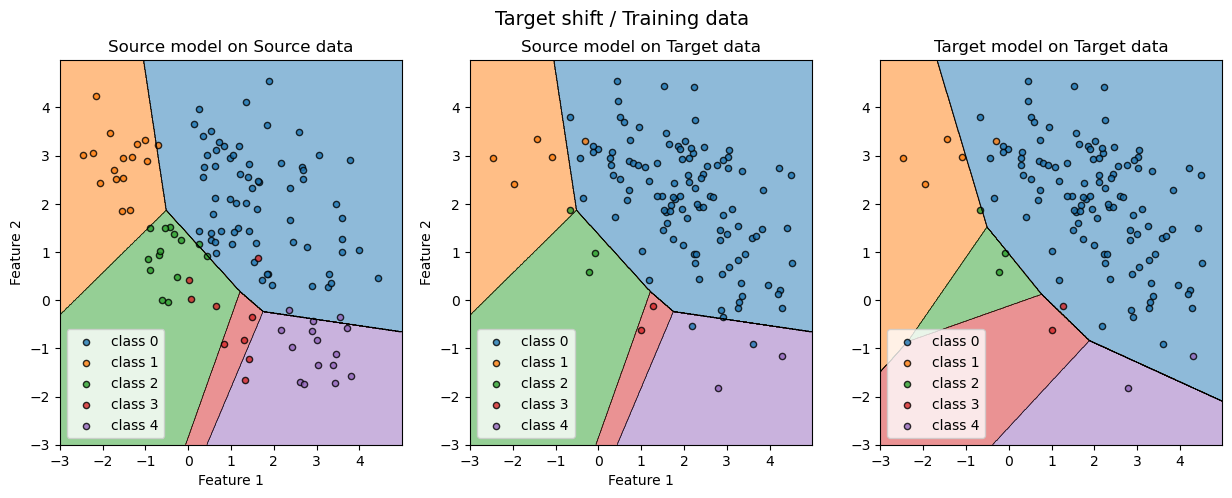

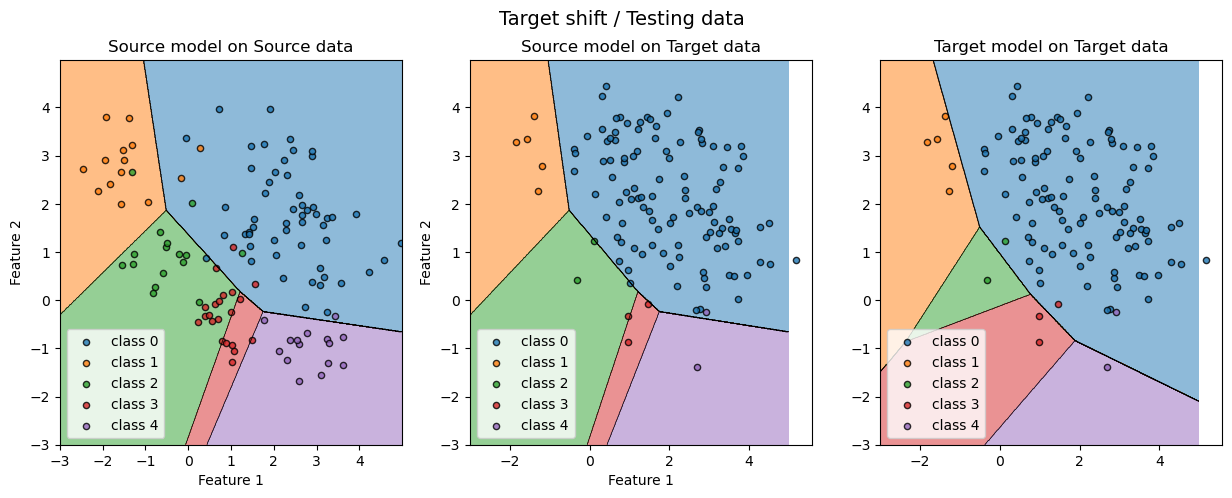

In [26]:
random_state=0
X, y, sample_domain = make_shifted_datasets(
        n_samples_source=30,
        n_samples_target=30,
        shift="target_shift",
        label="multiclass",
        noise=0.5,
        random_state=random_state,
        ratio=0.9
    )

X_source, X_target, y_source, y_target = source_target_split(X, y, sample_domain=sample_domain)


X_train_src, X_test_src, y_train_src, y_test_src = train_test_split(X_source, y_source, test_size=0.5, random_state=10, shuffle=True)
X_train_tgt, X_test_tgt, y_train_tgt, y_test_tgt = train_test_split(X_target, y_target, test_size=0.5, random_state=10, shuffle=True)

clf_src = svm.LinearSVC()
clf_tgt = svm.LinearSVC()

clf_src.fit(X_train_src,y_train_src)
clf_tgt.fit(X_train_tgt,y_train_tgt)

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))

plot_dec_func(ax[0], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Source data',alpha=0.5)
plot_dec_func(ax[1], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Target data',alpha=0.5)
plot_dec_func(ax[2], clf_tgt, -3, 5, -3, 5, plot_step = 0.01, title='Target model on Target data',alpha=0.5)

ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

plot_dots(ax[0],X_train_src,y_train_src, title='Source model on Source data')
plot_dots(ax[1],X_train_tgt,y_train_tgt, title='Source model on Target data')
plot_dots(ax[2],X_train_tgt,y_train_tgt, title='Target model on Target data')

fig.suptitle('Target shift / Training data', fontsize=14)

    
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))

plot_dec_func(ax[0], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Source data',alpha=0.5)
plot_dec_func(ax[1], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Target data',alpha=0.5)
plot_dec_func(ax[2], clf_tgt, -3, 5, -3, 5, plot_step = 0.01, title='Target model on Target data',alpha=0.5)

ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

plot_dots(ax[0],X_test_src,y_test_src, title='Source model on Source data')
plot_dots(ax[1],X_test_tgt,y_test_tgt, title='Source model on Target data')
plot_dots(ax[2],X_test_tgt,y_test_tgt, title='Target model on Target data')

fig.suptitle('Target shift / Testing data', fontsize=14)

## Conditional shift

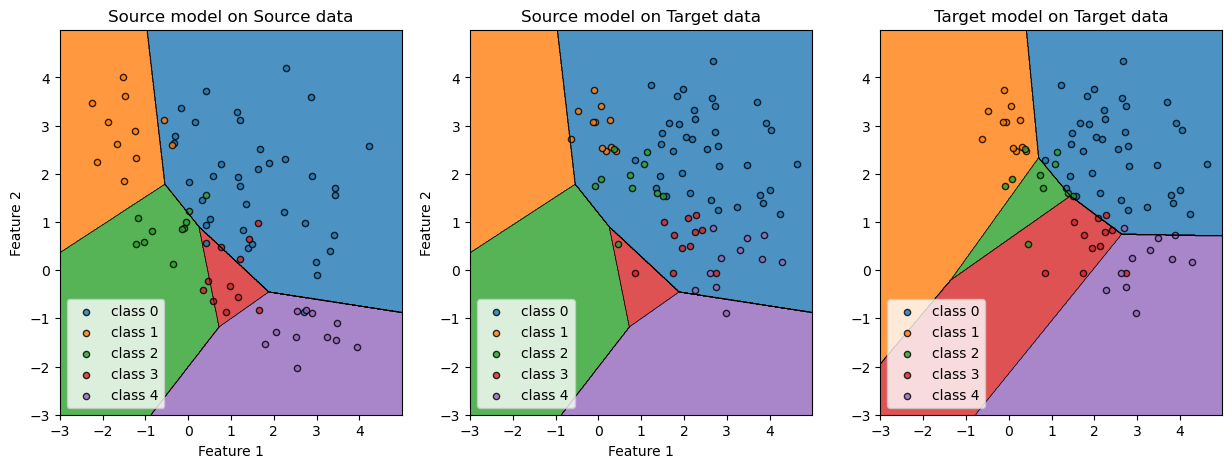

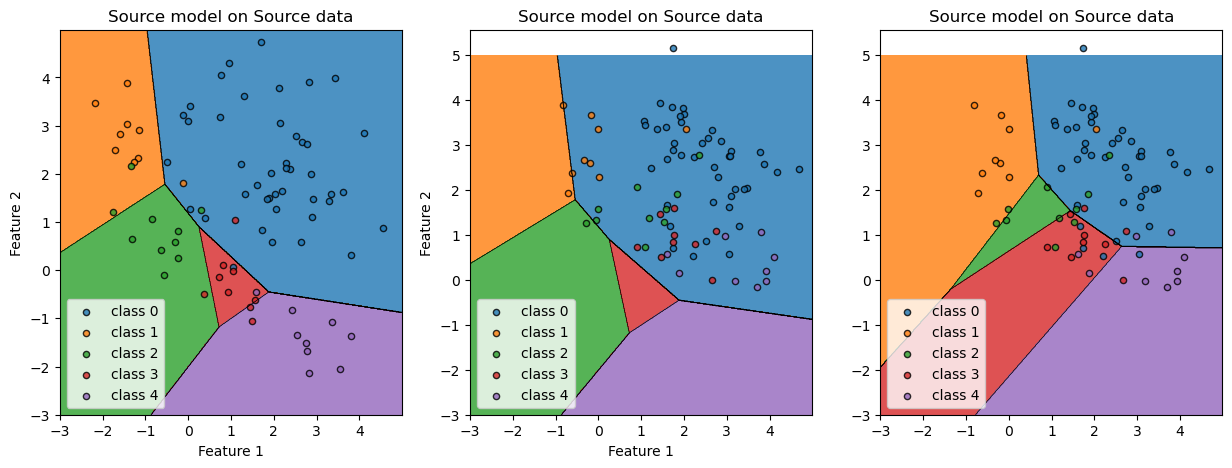

In [38]:
random_state=0
X, y, sample_domain = make_shifted_datasets(
        n_samples_source=20,
        n_samples_target=20,
        shift="conditional_shift",
        noise=0.6,
        label="multiclass",
        random_state=random_state,
        ratio=0.8,
        gamma=0.1
    )

X_source, X_target, y_source, y_target = source_target_split(X, y, sample_domain=sample_domain)

X_train_src, X_test_src, y_train_src, y_test_src = train_test_split(X_source, y_source, test_size=0.5, random_state=10, shuffle=True)
X_train_tgt, X_test_tgt, y_train_tgt, y_test_tgt = train_test_split(X_target, y_target, test_size=0.5, random_state=10, shuffle=True)


clf_src = svm.LinearSVC()
clf_tgt = svm.LinearSVC()

clf_src.fit(X_train_src,y_train_src)
clf_tgt.fit(X_train_tgt,y_train_tgt)

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))

plot_dec_func(ax[0], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Source data')
plot_dec_func(ax[1], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Target data')
plot_dec_func(ax[2], clf_tgt, -3, 5, -3, 5, plot_step = 0.01, title='Target model on Target data')

ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

plot_dots(ax[0],X_train_src,y_train_src, title='Source model on Source data')
plot_dots(ax[1],X_train_tgt,y_train_tgt, title='Source model on Target data')
plot_dots(ax[2],X_train_tgt,y_train_tgt, title='Target model on Target data')

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))

plot_dec_func(ax[0], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Source data')
plot_dec_func(ax[1], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Target data')
plot_dec_func(ax[2], clf_tgt, -3, 5, -3, 5, plot_step = 0.01, title='Target model on Target data')

ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

plot_dots(ax[0],X_test_src,y_test_src, title='Source model on Source data')
plot_dots(ax[1],X_test_tgt,y_test_tgt, title='Source model on Source data')
plot_dots(ax[2],X_test_tgt,y_test_tgt, title='Source model on Source data')

In [76]:
from sklearn.datasets import make_moons

def make_moons_da(n_samples=200, rotation=30, noise=0.05, random_state=0):
    Xs, ys = make_moons(n_samples=n_samples,
                        noise=noise,
                        random_state=random_state)
    Xs[:, 0] -= 0.5
    theta = np.radians(-rotation)
    cos_theta, sin_theta = np.cos(theta), np.sin(theta)
    rot_matrix = np.array(
        ((cos_theta, -sin_theta),
         (sin_theta, cos_theta))
    )
    Xt = Xs.dot(rot_matrix)
    yt = ys
    return Xs, ys, Xt, yt

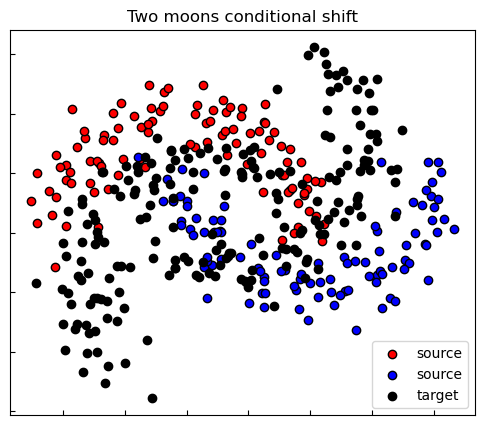

In [78]:
Xs, ys, Xt, yt = make_moons_da(n_samples=200, rotation=50, noise = 0.15)

x_min, y_min = np.min([Xs.min(0), Xt.min(0)], 0)
x_max, y_max = np.max([Xs.max(0), Xt.max(0)], 0)
x_grid, y_grid = np.meshgrid(np.linspace(x_min-0.1, x_max+0.1, 100),
                             np.linspace(y_min-0.1, y_max+0.1, 100))
X_grid = np.stack([x_grid.ravel(), y_grid.ravel()], -1)

fig, ax1 = plt.subplots(1, 1, figsize=(6, 5))
ax1.set_title("Two moons conditional shift")
ax1.scatter(Xs[ys==0, 0], Xs[ys==0, 1], label="source", edgecolors='k', c="red")
ax1.scatter(Xs[ys==1, 0], Xs[ys==1, 1], label="source", edgecolors='k', c="blue")
ax1.scatter(Xt[:, 0], Xt[:, 1], label="target", edgecolors='k', c="black")
ax1.legend(loc="lower right")
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.tick_params(direction ='in')
plt.show()

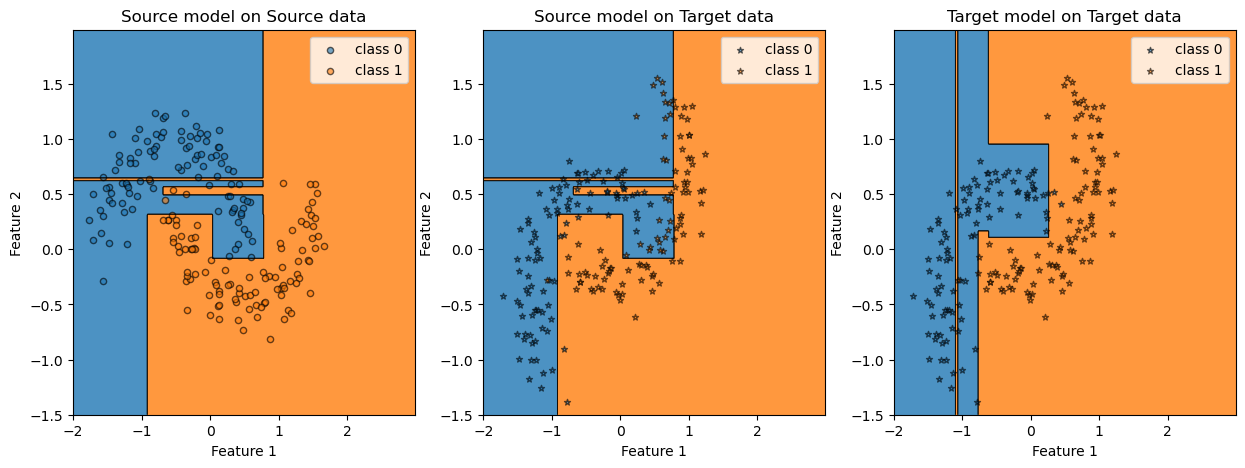

In [80]:
X_source, y_source = Xs, ys
X_target, y_target = Xt, yt

max_depth = None

clf_dt_src = DecisionTreeClassifier(max_depth=max_depth)
clf_dt_tgt = DecisionTreeClassifier(max_depth=max_depth)

X_train_src, X_test_src, y_train_src, y_test_src = train_test_split(X_source, y_source, test_size=0.3, random_state=10, shuffle=True)
X_train_tgt, X_test_tgt, y_train_tgt, y_test_tgt = train_test_split(X_target, y_target, test_size=0.3, random_state=10, shuffle=True)

clf_dt_src.fit(X_train_src,y_train_src)
clf_dt_tgt.fit(X_train_tgt,y_train_tgt)


fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))

plot_dec_func(ax[0], clf_dt_src, -2, 3, -1.5, 2, plot_step = 0.01, title='Source model on Source data',nc=1)
plot_dec_func(ax[1], clf_dt_src, -2, 3, -1.5, 2, plot_step = 0.01, title='Source model on Target data',nc=1)
plot_dec_func(ax[2], clf_dt_tgt, -2, 3, -1.5, 2, plot_step = 0.01, title='Target model on Target data',nc=1)

ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")
ax[2].set_xlabel("Feature 1")
ax[2].set_ylabel("Feature 2")

plot_dots(ax[0],X_source,y_source, title='Source model on Source data',marker=source_marker, s=20, alpha = 0.6)
plot_dots(ax[1],X_target,y_target, title='Source model on Target data',marker=target_marker, s=20, alpha = 0.6)
plot_dots(ax[2],X_target,y_target, title='Target model on Target data',marker=target_marker, s=20, alpha = 0.6)

## Subspace

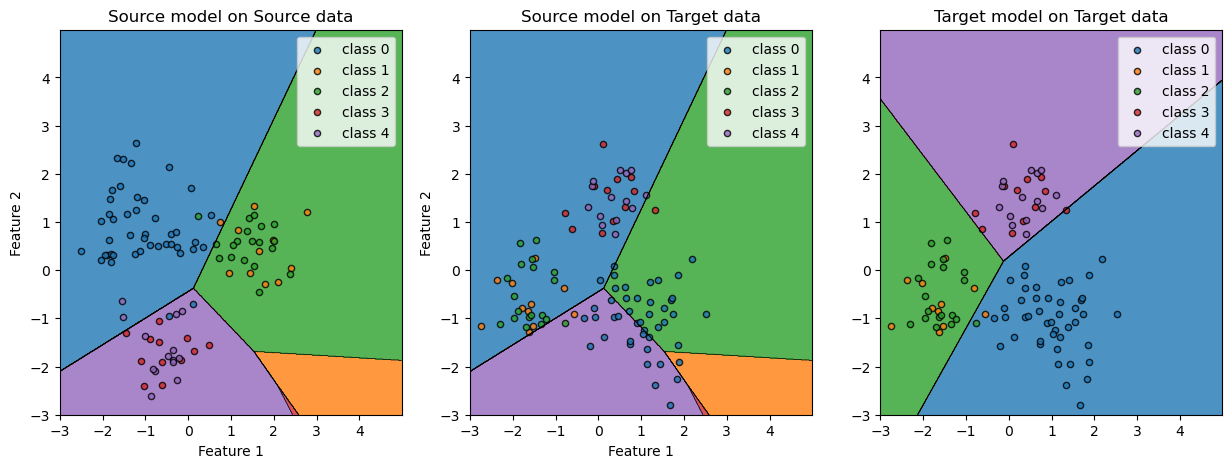

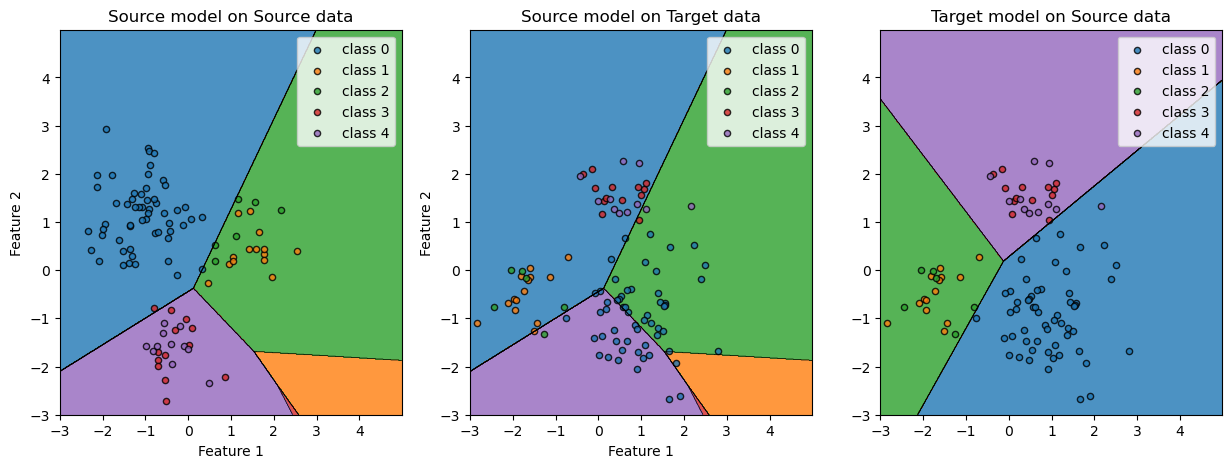

In [60]:
X, y, sample_domain = make_shifted_datasets(
    n_samples_source=50,
    n_samples_target=50,
    shift='subspace',
    noise=0.5,
    label="multiclass",
    random_state=random_state,
    ratio=0.9,
    gamma=0.3
)

X_source, X_target, y_source, y_target = source_target_split(
    X, y, sample_domain=sample_domain
)




X_train_src, X_test_src, y_train_src, y_test_src = train_test_split(X_source, y_source, test_size=0.5, random_state=10, shuffle=True)
X_train_tgt, X_test_tgt, y_train_tgt, y_test_tgt = train_test_split(X_target, y_target, test_size=0.5, random_state=10, shuffle=True)

clf_src = svm.LinearSVC()
clf_tgt = svm.LinearSVC()

clf_src.fit(X_train_src,y_train_src)
clf_tgt.fit(X_train_tgt,y_train_tgt)

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))

plot_dec_func(ax[0], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Source data')
plot_dec_func(ax[1], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Target data')
plot_dec_func(ax[2], clf_tgt, -3, 5, -3, 5, plot_step = 0.01, title='Target model on Target data')

ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

plot_dots(ax[0],X_train_src,y_train_src, title='Source model on Source data')
plot_dots(ax[1],X_train_tgt,y_train_tgt, title='Source model on Target data')
plot_dots(ax[2],X_train_tgt,y_train_tgt, title='Target model on Target data')

fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))

plot_dec_func(ax[0], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Source data')
plot_dec_func(ax[1], clf_src, -3, 5, -3, 5, plot_step = 0.01, title='Source model on Target data')
plot_dec_func(ax[2], clf_tgt, -3, 5, -3, 5, plot_step = 0.01, title='Target model on Target data')

ax[0].set_xlabel("Feature 1")
ax[0].set_ylabel("Feature 2")
ax[1].set_xlabel("Feature 1")
ax[1].set_ylabel("Feature 2")

plot_dots(ax[0],X_test_src,y_test_src, title='Source model on Source data')
plot_dots(ax[1],X_test_tgt,y_test_tgt, title='Source model on Target data')
plot_dots(ax[2],X_test_tgt,y_test_tgt, title='Target model on Source data')

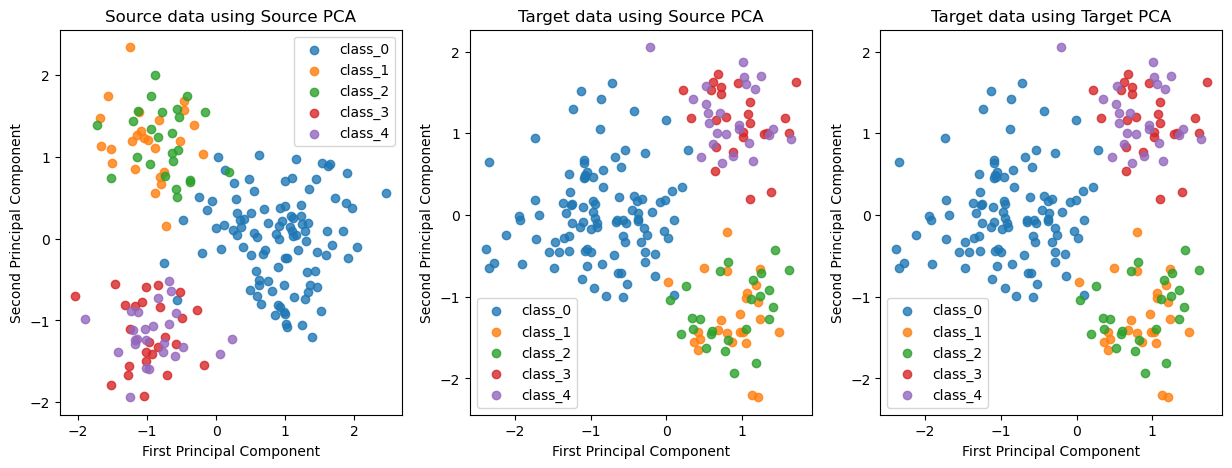

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

nc = len(set(y_source))
L = list(set(y_source))
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple']
         
# Standardize the features
scaler = StandardScaler()
X_source_s = scaler.fit_transform(X_source)
X_target_s = scaler.fit_transform(X_target)

n_components = 2
# Perform PCA
pca_src = PCA(n_components=n_components)
pca_tgt = PCA(n_components=n_components)

pca_src.fit(X_source_s)
pca_tgt.fit(X_target_s)


X_source_pca = pca_src.transform(X_source_s)
X_src_tgt_pca = pca_src.transform(X_target_s)
X_target_pca = pca_tgt.transform(X_target_s)

# Plot the first two principal components
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))

#for i, c in zip(range(k,k+1), colors[k]):
for k in range(nc):
    ax[0].scatter(X_source_pca[y_source == k, 0], X_source_pca[y_source == k, 1], c=colors[k], label='class_'+str(k),alpha=0.8)
    ax[0].set_xlabel('First Principal Component')
    ax[0].set_ylabel('Second Principal Component')
    ax[0].legend()
    ax[0].set_title('Source data using Source PCA')

    ax[1].scatter(X_src_tgt_pca[y_target == k, 0], X_src_tgt_pca[y_target == k, 1], c=colors[k], label='class_'+str(k),alpha=0.8)
    ax[1].set_xlabel('First Principal Component')
    ax[1].set_ylabel('Second Principal Component')
    ax[1].legend()
    ax[1].set_title('Target data using Source PCA')

    ax[2].scatter(X_target_pca[y_target == k, 0], X_target_pca[y_target == k, 1], c=colors[k], label='class_'+str(k),alpha=0.8)
    ax[2].set_xlabel('First Principal Component')
    ax[2].set_ylabel('Second Principal Component')
    ax[2].legend()
    ax[2].set_title('Target data using Target PCA')
plt.show()

## Office Caltech object recognition

In [83]:
import os
import time
import numpy as np
from scipy.io import loadmat
from scipy.spatial.distance import cdist
from sklearn import preprocessing
import random

In [95]:

###############################################################################
#                   Part of code about arguments to modify                    #
#                                                                             #

featuresToUse = "surf"  # surf, CaffeNet4096, GoogleNet1024
numberIteration = 10
adaptationAlgoUsed = ["NA", "SA"]
# see function adaptData for available algorithms

#                                                                             #
#               End of part of code about arguments to modify                 #
###############################################################################


def indices(a, func):
    return [i for (i, val) in enumerate(a) if func(val)]


def split(Y, nPerClass):
    idx1 = []
    idx2 = []
    for c in range(1, max(Y)+1):
        idx = indices(Y, lambda x: x == c)
        random.shuffle(idx)
        idx1 = idx1 + idx[0:min(nPerClass, len(idx))]
        idx2 = idx2 + idx[min(nPerClass, len(idx)):-1]
    return idx1, idx2


def adaptData(algo, sourceData, sourceLabels, targetData, targetLabels):
    if algo == "NA":  # No Adaptation
        sourceAdapted = sourceData
        targetAdapted = targetData
    if algo == "SA":
        # Subspace Alignment, described in:
        # Unsupervised Visual Domain Adaptation Using Subspace Alignment, 2013,
        # Fernando et al.
        from sklearn.decomposition import PCA
        d = 80  # subspace dimension
        pcaS = PCA(d).fit(sourceData)
        pcaT = PCA(d).fit(targetData)
        XS = np.transpose(pcaS.components_)[:, :d]  # source subspace matrix
        XT = np.transpose(pcaT.components_)[:, :d]  # target subspace matrix
        Xa = XS.dot(np.transpose(XS)).dot(XT)  # align source subspace
        sourceAdapted = sourceData.dot(Xa) # project source in aligned subspace
        targetAdapted = targetData.dot(XT) # project target in target subspace

    return sourceAdapted, targetAdapted


def getAccuracy(trainData, trainLabels, testData, testLabels):
    # ------------ Accuracy evaluation by performing a 1NearestNeighbor
    dist = cdist(trainData, testData, metric='sqeuclidean')
    minIDX = np.argmin(dist, axis=0)
    prediction = trainLabels[minIDX]
    accuracy = 100 * float(sum(prediction == testLabels)) / len(testData)
    return accuracy

# ---------------------------- DATA Loading Part ------------------------------

domainNames = ['dslr','webcam']
tests = []
data = {}

for sourceDomain in domainNames:
    possible_data = loadmat(os.path.join(".", "features_OfficeCaltech", featuresToUse,
                                         sourceDomain + '.mat'))
    if featuresToUse == "surf":
        # Normalize the surf histograms
        feat = (possible_data['fts'].astype(float) /
                np.tile(np.sum(possible_data['fts'], 1),
                        (np.shape(possible_data['fts'])[1], 1)).T)
    else:
        feat = possible_data['fts'].astype(float)

    # Z-score
    feat = preprocessing.scale(feat)

    labels = possible_data['labels'].ravel()
    data[sourceDomain] = [feat, labels]
    for targetDomain in domainNames:
        if sourceDomain != targetDomain:
            perClassSource = 20
            if sourceDomain == 'dslr':
                perClassSource = 8
            tests.append([sourceDomain, targetDomain, perClassSource])

meansAcc = {}
stdsAcc = {}
print("Feature used: ", featuresToUse)
print("Number of iterations: ", numberIteration)
print("Adaptation algorithms used: ", end="")
for name in adaptationAlgoUsed:
    meansAcc[name] = []
    stdsAcc[name] = []
    print(" ", name, end="")
print("")

Feature used:  surf
Number of iterations:  10
Adaptation algorithms used:   NA  SA


In [97]:
# -------------------- Main testing loop --------------------------------------
for test in tests:
    startTime = time.time()
    Sname = test[0]
    Tname = test[1]
    perClassSource = test[2]
    print(Sname.upper()[:1] + '->' + Tname.upper()[:1], end=" ")

    # --------------------II. prepare data-------------------------------------
    Sx = data[Sname][0]
    Sy = data[Sname][1]
    Tx = data[Tname][0]
    Ty = data[Tname][1]

    # --------------------III. run experiments---------------------------------
    results = {}
    for name in adaptationAlgoUsed:
        results[name] = []
    for iteration in range(numberIteration):
        id1, id2 = split(Sy, perClassSource)
        subSx = Sx[id1, :]
        subSy = Sy[id1]

        for name in adaptationAlgoUsed:
            # Apply domain adaptation algorithm
            subSa, Ta = adaptData(name, subSx, subSy, Tx, Ty)
            # Compute the accuracy classification
            results[name].append(getAccuracy(subSa, subSy, Ta, Ty))
        print(".", end="")

    currentTime = time.time()
    print(" {:6.2f}".format(currentTime - startTime) + "s")

    for name in adaptationAlgoUsed:
        meanAcc = np.mean(results[name])
        stdAcc = np.std(results[name])
        meansAcc[name].append(meanAcc)
        stdsAcc[name].append(stdAcc)
        print("     {:4.1f}".format(meanAcc), " {:3.1f}".format(stdAcc), name)
        


D->W ..........   0.83s
     51.7  1.8 NA
     78.5  2.4 SA
W->D ..........   1.03s
     53.4  2.8 NA
     82.9  1.9 SA


In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



nc = 10

# Standardize the features
scaler = StandardScaler()
X_source_s = scaler.fit_transform(Sx)
X_target_s = scaler.fit_transform(Tx)

n_components = 3
# Perform PCA
pca_src = PCA(n_components=n_components)
pca_tgt = PCA(n_components=n_components)

pca_src.fit(X_source_s)
pca_tgt.fit(X_source_s)
pca_tgt.fit(X_target_s)


X_source_pca = pca_src.transform(X_source_s)
X_src_tgt_pca = pca_src.transform(X_target_s)
X_target_pca = pca_tgt.transform(X_target_s)

y_source = Sy
y_target = Ty

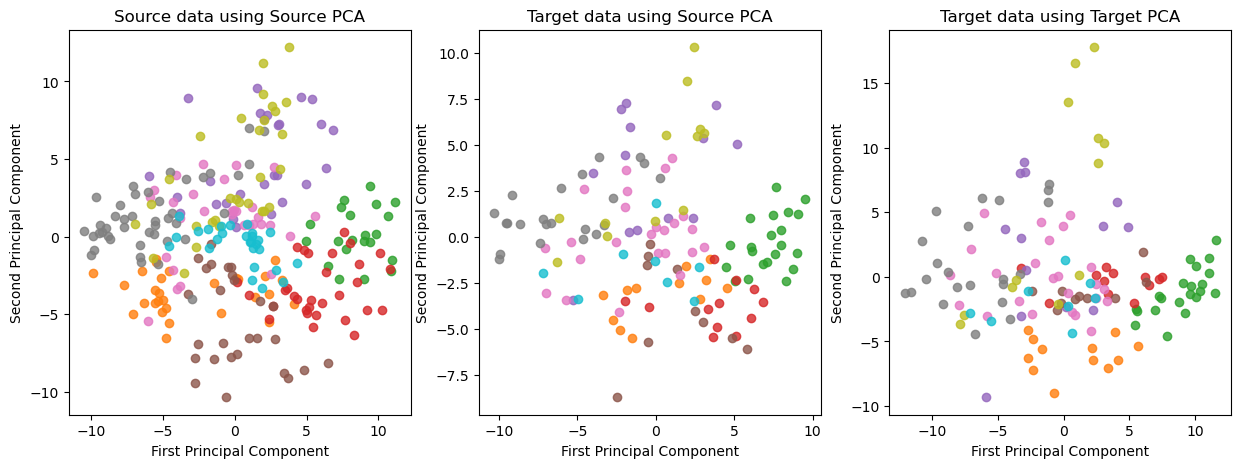

In [101]:
# Plot the first two principal components
fig, ax = plt.subplots(nrows=1, ncols=3,figsize=(15, 5))

for k in range(nc):
    ax[0].scatter(X_source_pca[y_source == k, 0], X_source_pca[y_source == k, 1], label='class_'+str(k),alpha=0.8)
    ax[0].set_xlabel('First Principal Component')
    ax[0].set_ylabel('Second Principal Component')
    ax[0].set_title('Source data using Source PCA')

    ax[1].scatter(X_src_tgt_pca[y_target == k, 0], X_src_tgt_pca[y_target == k, 1], label='class_'+str(k),alpha=0.8)
    ax[1].set_xlabel('First Principal Component')
    ax[1].set_ylabel('Second Principal Component')
    ax[1].set_title('Target data using Source PCA')

    ax[2].scatter(X_target_pca[y_target == k, 0], X_target_pca[y_target == k, 1], label='class_'+str(k),alpha=0.8)
    ax[2].set_xlabel('First Principal Component')
    ax[2].set_ylabel('Second Principal Component')
    ax[2].set_title('Target data using Target PCA')
plt.show()


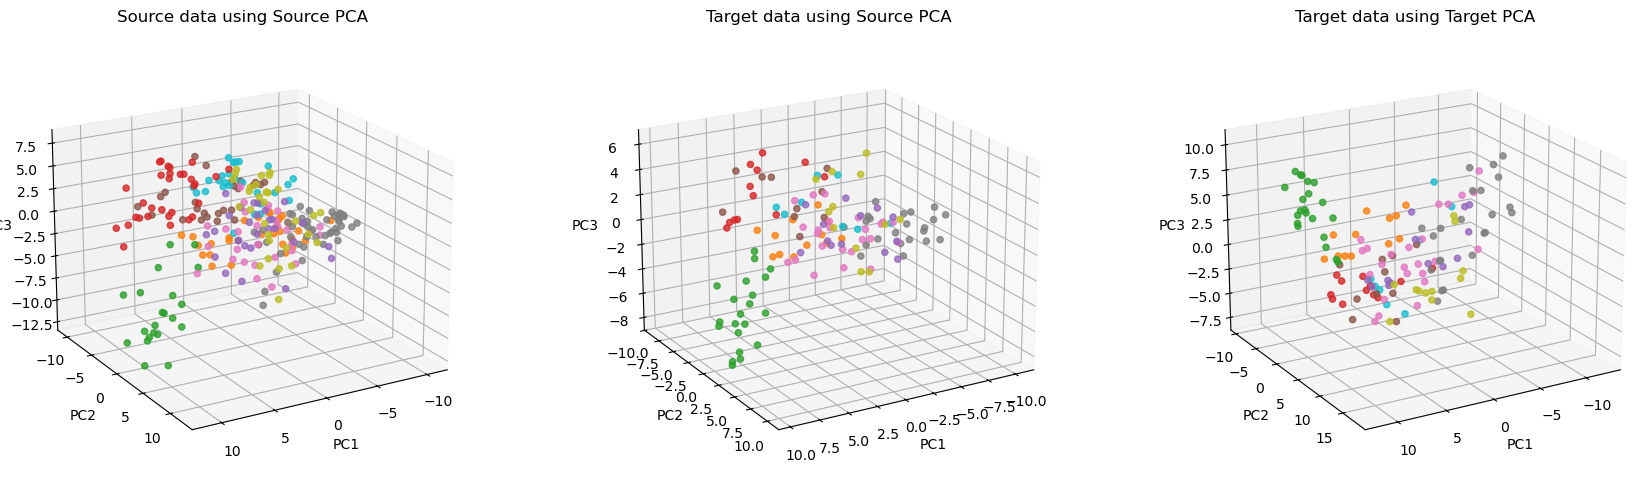

In [103]:
# 3D subplots
fig = plt.figure(figsize=(18, 5))
ax0 = fig.add_subplot(1, 3, 1, projection='3d')
ax1 = fig.add_subplot(1, 3, 2, projection='3d')
ax2 = fig.add_subplot(1, 3, 3, projection='3d')
ax0.view_init(elev=20, azim=60)   # example: 30° up, 45° around
ax1.view_init(elev=20, azim=60)
ax2.view_init(elev=20, azim=60)
for k in range(nc):
    ax0.scatter(
        X_source_pca[y_source == k, 0],
        X_source_pca[y_source == k, 1],
        X_source_pca[y_source == k, 2],
        label='class_' + str(k),
        alpha=0.8
    )
    ax1.scatter(
        X_src_tgt_pca[y_target == k, 0],
        X_src_tgt_pca[y_target == k, 1],
        X_src_tgt_pca[y_target == k, 2],
        label='class_' + str(k),
        alpha=0.8
    )
    ax2.scatter(
        X_target_pca[y_target == k, 0],
        X_target_pca[y_target == k, 1],
        X_target_pca[y_target == k, 2],
        label='class_' + str(k),
        alpha=0.8
    )

ax0.set_xlabel('PC1'); ax0.set_ylabel('PC2'); ax0.set_zlabel('PC3')
ax0.set_title('Source data using Source PCA')
ax1.set_xlabel('PC1'); ax1.set_ylabel('PC2'); ax1.set_zlabel('PC3')
ax1.set_title('Target data using Source PCA')
ax2.set_xlabel('PC1'); ax2.set_ylabel('PC2'); ax2.set_zlabel('PC3')
ax2.set_title('Target data using Target PCA')

plt.tight_layout()
plt.show()